In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Matrix

1. The population of a certain country is modeled with three age groups: minors, adults, and silvers. Each year 5% of the minors grow into adulthood and 2% pass away from childhood diseases. Each year 4% of adults become silvers, 2% pass away, and there is a 3% reproduction rate. Each year 5% of the seniors pass away and there is a 1% reproduction rate.

a) If the population vector is $P = \begin{bmatrix} \text{seniors} \\ \text{adults} \\ \text{minors} \end{bmatrix}$ find the matrix $A$ for which $P_{n + 1} = AP_n$ where $P_n$ is the population vector at time $n$.


In [5]:
senior_attrition = 0.05
adult_attrition = 0.02
child_attrition = 0.02

senior_reproduction = 0.01
adult_reproduction = 0.03

adult_graduation = 0.04
child_graduation = 0.05

A = np.array([
    [1 - senior_attrition, adult_graduation, 0],
    [0, 1 - adult_graduation - adult_attrition, child_graduation],
    [senior_reproduction, adult_reproduction, 1 - child_graduation - child_attrition]
])

A

array([[0.95, 0.04, 0.  ],
       [0.  , 0.94, 0.05],
       [0.01, 0.03, 0.93]])

b) Suppose, following a period of a "baby boom" you begin with an initial population vector $P_0 = \begin{bmatrix} 2 \\ 5 \\ 6 \end{bmatrix}$. Using your matrix $A$, calculate and plot the three sub-populations on a single graph for the next 50 years under the assumptions above.

In [11]:
p_0 = np.array([2, 5, 6])
p_0

array([2, 5, 6])

In [12]:
projections = np.ones([3, 50])
projections[:, 0] = p_0

for i in range(1, 50):
    projections[:, i] = A @ projections[:, i - 1]

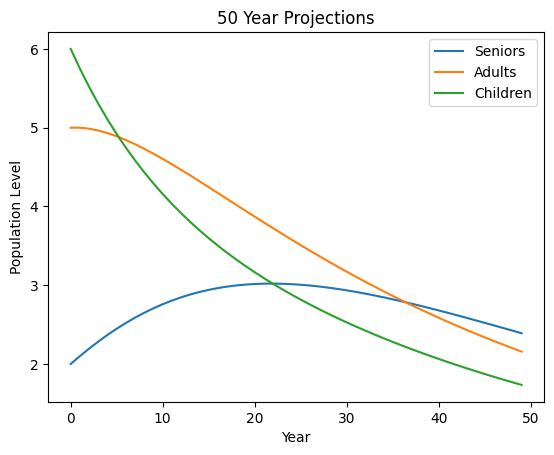

In [18]:
plots = plt.plot(projections.T)
plt.legend(plots, ["Seniors", "Adults", "Children"])
plt.title("50 Year Projections")
plt.xlabel("Year")
plt.ylabel("Population Level")
plt.show()

c) From the largest eigenvalue/eigenvector, what is the overall limiting population growth rate (e.g. 1.02 or .97 etc) and what is the limiting population distribution? Calculate the ratio of each computed total population to that of the preceding year and plot it in a separate plot along with the horizontal line representing the limiting population growth rate. In the same figure plot the fraction of the computed population in each group over time and compare with the with distribution predicted by the largest eigenvalue’s corresponding eigenvector.

In [35]:
A_eigenvalues = np.linalg.eig(A).eigenvalues
A_eigenvectors = np.linalg.eig(A).eigenvectors

print(A_eigenvalues)
print(A_eigenvectors)

[0.90166502 0.93685557 0.98147941]
[[-0.54894551 -0.94983762 -0.69918273]
 [ 0.66333178  0.31212689 -0.55024655]
 [-0.50857623 -0.01962923 -0.45647808]]


The largest eigenvalue is 0.98147941, and it's eigenvector is all negative. So, the limiting distribution of the population is the zero vector.

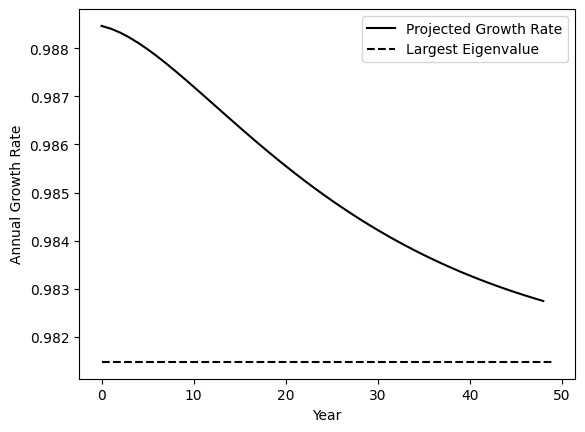

In [39]:
projected_total_population = projections.sum(axis=0)
projected_total_population_annual_growth = projected_total_population[1:] / projected_total_population[:-1]

plt.plot(projected_total_population_annual_growth, color="black", label="Projected Growth Rate")
plt.hlines(np.max(A_eigenvalues), 0, len(projected_total_population_annual_growth), color="black", linestyle="dashed", label="Largest Eigenvalue")
plt.legend()
plt.ylabel("Annual Growth Rate")
plt.xlabel("Year")
plt.show()

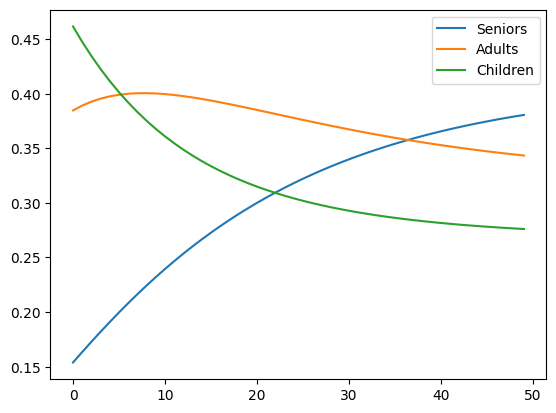

In [42]:
projected_proportions = projections / projected_total_population
lines = plt.plot(projected_proportions.T)
plt.legend(lines, ["Seniors", "Adults", "Children"])

d) The government is obviously concerned over the low reproduction rate facing them
for the next 50 years and decides to begin an incentive program to encourage more
babies being born to adults. What is the target adult reproduction rate that will stabilize
the population over time (overall population growth rate of 1)? Assume that the
program is immediately successful in achieving a stable growth rate. Given the same
initial vector $\begin{bmatrix} 2 \\ 5 \\ 6\end{bmatrix}$, calculate the limiting population vector (not just the
distribution but the actual populations of the subgroups) ? For this you will need the
three eigenvalues/eigenvectors and solve the initial value problem.

In [53]:
g = symbols("g")
l = symbols("lambda")

A_e = Matrix(A.tolist())
A_e[2, 1] = g
A_e

Matrix([
[0.95, 0.04,  0.0],
[ 0.0, 0.94, 0.05],
[0.01,    g, 0.93]])

In [58]:
list(A_e.eigenvals().keys())[0]

-0.86066296582387*(0.15*g + 0.000300000000000189)/(0.116189500386221*g + sqrt(0.0134999999999997*(g - 0.0400000000005915)**2 - (g + 0.00200000000000126)**3) - 0.00464758001551757)**(1/3) - 0.129099444873581*(0.116189500386221*g + sqrt(0.0134999999999997*(g - 0.0400000000005915)**2 - (g + 0.00200000000000126)**3) - 0.00464758001551757)**(1/3) + 0.94